In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_tsne = pd.read_parquet('data/results/df_tsne.parquet')
df_tsne.head()

,PC1,PC2,Label
0,0.967406,-69.693619,NetBIOS
1,78.376030,-15.459142,LDAP
2,43.559002,-40.516380,NetBIOS
3,64.666115,22.998545,LDAP
4,64.986031,22.281092,LDAP


In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)

df_tsne['cluster'] = dbscan.fit_predict(df_tsne[['PC1', 'PC2']])

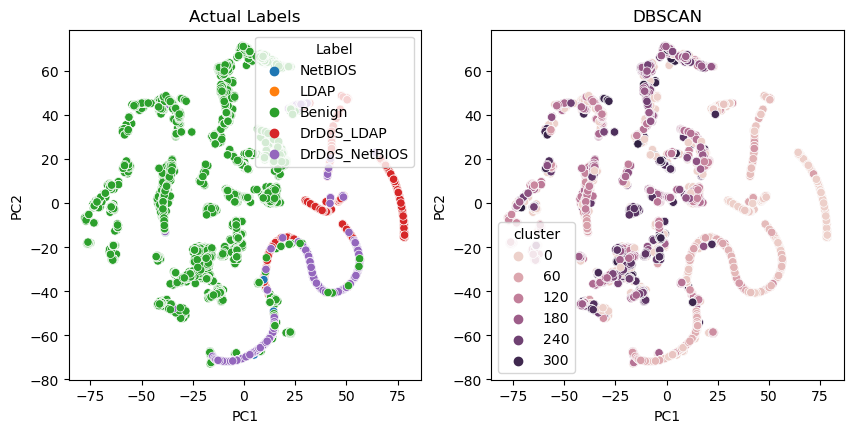

In [9]:
# plot the data and the clusters learned
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne)
plt.title('Actual Labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_tsne)
plt.title('DBSCAN')
plt.show()

We can see that the DBSCAN algorithm is able to separate the attacks from the benign traffic. However, it is not able to separate the different types of attacks. It either cannot group all the benign traffic together. This is because we can visually see that the benign traffic is separated into small groups.

In [42]:
df_tsne['Predicted'] = df_tsne['cluster'] < 60
df_tsne['Predicted'] = df_tsne['Predicted'].replace({True: 'Attack', False: 'Benign'})

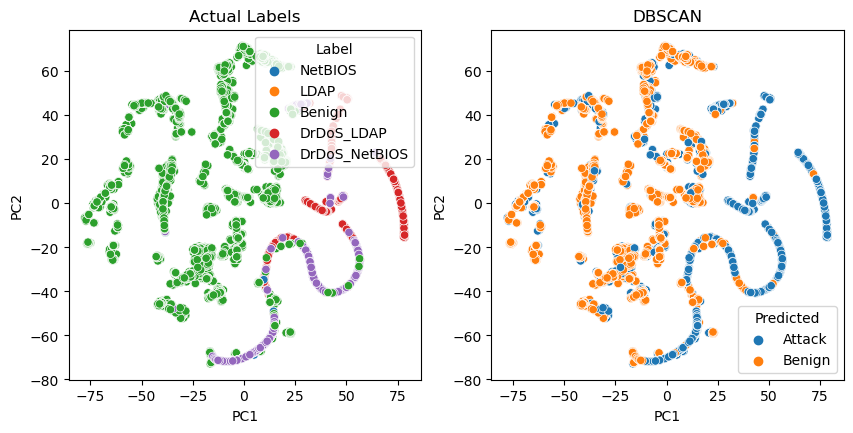

In [43]:
# plot the data and the clusters learned
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne)
plt.title('Actual Labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='Predicted', data=df_tsne)
plt.title('DBSCAN')
plt.show()

<Axes: xlabel='Predicted', ylabel='Label'>

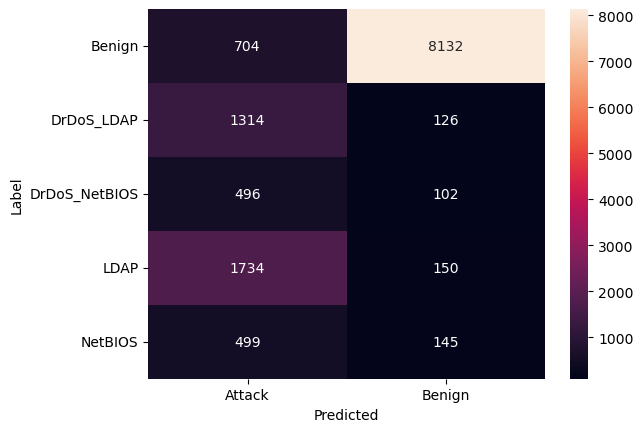

In [52]:
# check the TP, TN, FP, FN
sns.heatmap(pd.crosstab(df_tsne['Label'], df_tsne['Predicted']), annot=True, fmt='d')

<Axes: >

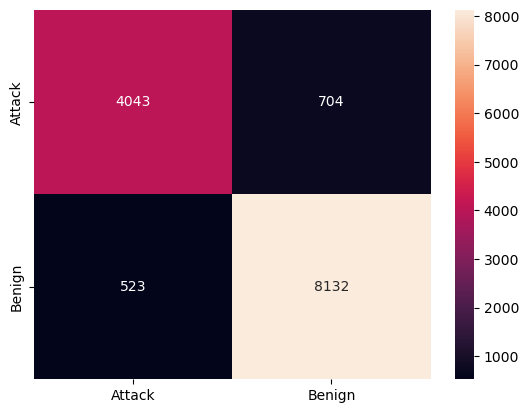

In [57]:
TP = df_tsne[(df_tsne['Label'] != 'Benign') & (df_tsne['Predicted'] == 'Attack')].shape[0]
TN = df_tsne[(df_tsne['Label'] == 'Benign') & (df_tsne['Predicted'] == 'Benign')].shape[0]
FP = df_tsne[(df_tsne['Label'] == 'Benign') & (df_tsne['Predicted'] == 'Attack')].shape[0]
FN = df_tsne[(df_tsne['Label'] != 'Benign') & (df_tsne['Predicted'] == 'Benign')].shape[0]

confusion_matrix = pd.DataFrame([[TP, FP], [FN, TN]], columns=['Attack', 'Benign'], index=['Attack', 'Benign'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [58]:
# compute the accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy: ', accuracy)

Accuracy:  0.9084465005223101


The clustering algorithm doesn't aim to classify the attack type. However, it is able to separate the attacks from the benign traffic. This shows that the clustering algorithm is able to detect anomalies in the data.